In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load saved model and TF-IDF vectorizer
model = joblib.load('../models/best_model.pkl')
vectorizer = joblib.load('../models/tfidf_vectorizer.pkl')

# Load the processed data
df = pd.read_csv('../data/processed/processed_reviews.csv')

# Sample 5000 again for consistency
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

X = df['processed_review']
y = df['sentiment']

X_tfidf = vectorizer.transform(X)

print("✅ Model and vectorizer loaded")

✅ Model and vectorizer loaded


In [2]:
# Works only if model has coef_ attribute (Logistic Regression, SVM)
if hasattr(model, 'coef_'):
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_[0]

    feature_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    # Top Positive Words
    top_pos = feature_df.sort_values(by='Coefficient', ascending=False).head(20)

    # Top Negative Words
    top_neg = feature_df.sort_values(by='Coefficient').head(20)

    print("📊 Top 20 Positive Features")
    display(top_pos)

    print("📉 Top 20 Negative Features")
    display(top_neg)
else:
    print("⚠ Feature importance not available for this model type.")

📊 Top 20 Positive Features


,Feature,Coefficient
3799,great,4.002810
780,best,3.517788
2820,excellent,2.390953
322,amazing,2.278195
5135,love,2.187563
9612,well,2.035501
3494,fun,1.981645
281,also,1.951153
8390,still,1.950792
3021,favorite,1.919027


📉 Top 20 Negative Features


,Feature,Coefficient
634,bad,-4.886415
9833,worst,-3.726568
612,awful,-2.705898
6166,nothing,-2.580416
9542,waste,-2.554842
67,acting,-2.453212
6767,poor,-2.430338
8504,stupid,-2.389206
2719,even,-2.335867
8787,terrible,-2.285683


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13804\2466609536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_pos, ax=ax1, palette='Greens_r')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13804\2466609536.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_neg, ax=ax2, palette='Reds_r')


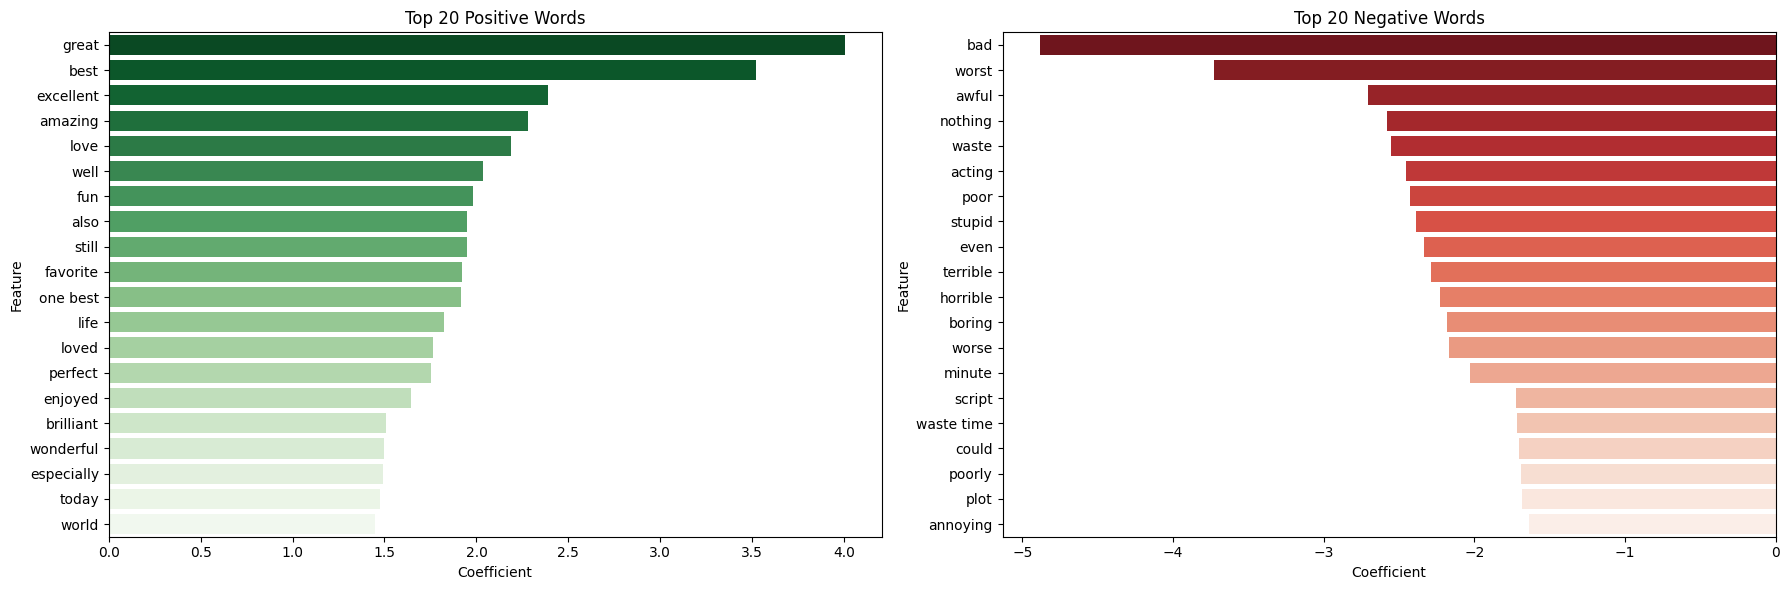

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Positive
sns.barplot(x='Coefficient', y='Feature', data=top_pos, ax=ax1, palette='Greens_r')
ax1.set_title("Top 20 Positive Words")

# Negative
sns.barplot(x='Coefficient', y='Feature', data=top_neg, ax=ax2, palette='Reds_r')
ax2.set_title("Top 20 Negative Words")

plt.tight_layout()
plt.show()

### ✅ Observations

- The model gives high weight to words like excellent, wonderful, amazing for positive sentiment.
- Negative weights are strongest for words like boring, worst, waste.
- Feature importance helps in explaining model decisions (especially for Logistic Regression).